Calculate Abnormal Return

In [47]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from datetime import datetime
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [48]:
df = pd.read_csv('/Users/jiayuncao/Desktop/Finance/Qfinancedata/s_dq_close.csv', encoding='utf-8')
df.head()


,trade_days,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,...,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH,T00018.SH
0,1990-12-03,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1990-12-04,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1990-12-05,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1990-12-06,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1990-12-07,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [49]:
#时间区间定位2005-01-04到2017-12-01
df2 = df.loc[(df['trade_days'] >= '2005-01-04')&(df['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)
df2['trade_days'] = pd.to_datetime(df2['trade_days'], format='%Y-%m-%d')
dr = df2.copy()
dr['year'] = df2['trade_days'].dt.year


In [50]:
#导入指数
df3 = pd.read_csv("/Users/jiayuncao/Desktop/Finance/Qfinancedata/sh000300.csv", encoding='utf-8')
df3 = df3.rename(columns={'date':'trade_days'})
df3 = df3.rename(columns={'close':'sh000300'})
df3['trade_days'] = pd.to_datetime(df3['trade_days'], format='%Y-%m-%d')
df3 = df3.loc[(df3['trade_days'] >= '2005-01-04')&(df3['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)
df3.head()

,symbol,trade_days,open,high,low,sh000300,volume,turnover
0,SH000300,2005-01-04,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000
1,SH000300,2005-01-05,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000
2,SH000300,2005-01-06,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000
3,SH000300,2005-01-07,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000
4,SH000300,2005-01-10,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000


In [51]:
#数据格式转化
df4 = df2.melt(id_vars=['trade_days'])
df4 = df4.rename(columns={'variable':'ticker'})
df4 = df4.rename(columns={'value':'price'})
df4.head()

,trade_days,ticker,price
0,2005-01-04,000001.SZ,6.52000
1,2005-01-05,000001.SZ,6.46000
2,2005-01-06,000001.SZ,6.52000
3,2005-01-07,000001.SZ,6.51000
4,2005-01-10,000001.SZ,6.59000


In [52]:
# Change the date string to a date variable
df4['trade_days'] = pd.to_datetime(df4['trade_days'], format='%Y-%m-%d')
df4 = df4.sort_values(by=['ticker', 'trade_days']).reset_index(drop=True)
df4.head()

,trade_days,ticker,price
0,2005-01-04,000001.SZ,6.52000
1,2005-01-05,000001.SZ,6.46000
2,2005-01-06,000001.SZ,6.52000
3,2005-01-07,000001.SZ,6.51000
4,2005-01-10,000001.SZ,6.59000


In [53]:
#合并数据
df5 = df4.merge(df3, on=['trade_days'], how='left')
df5.head()

,trade_days,ticker,price,symbol,open,high,low,sh000300,volume,turnover
0,2005-01-04,000001.SZ,6.52000,SH000300,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000
1,2005-01-05,000001.SZ,6.46000,SH000300,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000
2,2005-01-06,000001.SZ,6.52000,SH000300,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000
3,2005-01-07,000001.SZ,6.51000,SH000300,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000
4,2005-01-10,000001.SZ,6.59000,SH000300,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000


In [54]:
# returns per each stock and index
# Change relevant datatypes to floats
df5['price'] = pd.to_numeric(df5['price'])
df5['sh000300'] = pd.to_numeric(df5['sh000300'])
df5['stock_pct'] = df5['price'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
df5['index_pct'] = df5['sh000300'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
# df5['stock_pct'] = df5.groupby('ticker')['price'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
# df5['index_pct'] = df5.groupby('ticker')['sh000300'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
# df5.dropna(subset=['stock_pct'], inplace=True)
df5 = df5.reset_index(drop = True)
df5.head()


,trade_days,ticker,price,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct
0,2005-01-04,000001.SZ,6.52000,SH000300,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000,nan,nan
1,2005-01-05,000001.SZ,6.46000,SH000300,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000,nan,nan
2,2005-01-06,000001.SZ,6.52000,SH000300,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000,nan,nan
3,2005-01-07,000001.SZ,6.51000,SH000300,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000,nan,nan
4,2005-01-10,000001.SZ,6.59000,SH000300,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000,nan,nan


In [55]:
# AR
df5['AR'] = df5['stock_pct'] - df5['index_pct']
df5.head()

,trade_days,ticker,price,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct,AR
0,2005-01-04,000001.SZ,6.52000,SH000300,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000,nan,nan,nan
1,2005-01-05,000001.SZ,6.46000,SH000300,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000,nan,nan,nan
2,2005-01-06,000001.SZ,6.52000,SH000300,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000,nan,nan,nan
3,2005-01-07,000001.SZ,6.51000,SH000300,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000,nan,nan,nan
4,2005-01-10,000001.SZ,6.59000,SH000300,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000,nan,nan,nan


In [56]:
# 涨跌
df5['涨跌'] = ''

df5.loc[df5.AR>0, '涨跌'] = "过涨"
df5.loc[df5.AR<0, '涨跌'] = "过跌"
df5.loc[df5.AR==0, '涨跌'] = "平"
df5.head()

,trade_days,ticker,price,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct,AR,涨跌
0,2005-01-04,000001.SZ,6.52000,SH000300,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000,nan,nan,nan,
1,2005-01-05,000001.SZ,6.46000,SH000300,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000,nan,nan,nan,
2,2005-01-06,000001.SZ,6.52000,SH000300,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000,nan,nan,nan,
3,2005-01-07,000001.SZ,6.51000,SH000300,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000,nan,nan,nan,
4,2005-01-10,000001.SZ,6.59000,SH000300,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000,nan,nan,nan,


In [57]:
#分四季度
df5['year'] = df5['trade_days'].dt.year
df5['quarter'] = df5['trade_days'].dt.quarter
df5['year_quarter'] = df5.trade_days.dt.year * 100 + df5.trade_days.dt.quarter
df5.head()

,trade_days,ticker,price,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct,AR,涨跌,year,quarter,year_quarter
0,2005-01-04,000001.SZ,6.52000,SH000300,994.76000,994.76000,980.65000,982.79000,741286900,4431975936.00000,nan,nan,nan,,2005,1,200501
1,2005-01-05,000001.SZ,6.46000,SH000300,981.57000,997.32000,979.87000,992.56000,711910900,4529206784.00000,nan,nan,nan,,2005,1,200501
2,2005-01-06,000001.SZ,6.52000,SH000300,993.33000,993.78000,980.33000,983.17000,628802800,3921015040.00000,nan,nan,nan,,2005,1,200501
3,2005-01-07,000001.SZ,6.51000,SH000300,983.04000,995.71000,979.81000,983.95000,729869400,4737467904.00000,nan,nan,nan,,2005,1,200501
4,2005-01-10,000001.SZ,6.59000,SH000300,983.76000,993.95000,979.78000,993.87000,579169700,3762930944.00000,nan,nan,nan,,2005,1,200501


In [58]:
#取每季度中AR的mean值当作本季度该股票的AR，即累加每日的AR后，再除以天数，得到一个平均累计
df6 = df5.groupby(['ticker','year_quarter','year','quarter'])['AR'].mean().reset_index()
df6.head()

,ticker,year_quarter,year,quarter,AR
0,000001.SZ,200501,2005,1,nan
1,000001.SZ,200502,2005,2,0.08963
2,000001.SZ,200503,2005,3,0.04078
3,000001.SZ,200504,2005,4,-0.04313
4,000001.SZ,200601,2006,1,-0.04314


In [59]:
bins = [np.NINF,-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, np.inf]
df6['binned'] = pd.cut(df6['AR'], bins)
df6.head()

,ticker,year_quarter,year,quarter,AR,binned
0,000001.SZ,200501,2005,1,nan,NaN
1,000001.SZ,200502,2005,2,0.08963,"(0.0, 0.1]"
2,000001.SZ,200503,2005,3,0.04078,"(0.0, 0.1]"
3,000001.SZ,200504,2005,4,-0.04313,"(-0.1, 0.0]"
4,000001.SZ,200601,2006,1,-0.04314,"(-0.1, 0.0]"


In [60]:
#每个季度中达到40%AR的股票
# df7 = df6.loc[df6.AR>0.4, :].sort_values(by=['year_quarter', 'ticker','year','quarter']).reset_index(drop=True)
# df7.head(10)

# 按行业summary

In [61]:
#导入行业数据
df_industry = pd.read_excel('/Users/jiayuncao/Desktop/Finance/Qfinancedata/stock_industry.xlsx', encoding='utf-8')
df_industry = df_industry.rename(columns={'证券代码':'ticker'})
df_industry = df_industry.rename(columns={'证券名称':'stock_name'})
df_industry = df_industry.rename(columns={'所属证监会行业(新)代码\r':'industry_code'})
df_industry = df_industry.rename(columns={'所属证监会行业(新)\r':'industry_name'})
df_industry.head(10)

,ticker,stock_name,industry_code,industry_name
0,000001.SZ,平安银行,J,金融业
1,000002.SZ,万科A,K,房地产业
2,000004.SZ,国农科技,C,制造业
3,000005.SZ,世纪星源,N,水利、环境和公共设施管理业
4,000006.SZ,深振业A,K,房地产业
5,000007.SZ,全新好,K,房地产业
6,000008.SZ,神州高铁,C,制造业
7,000009.SZ,中国宝安,S,综合
8,000010.SZ,*ST美丽,E,建筑业
9,000011.SZ,深物业A,K,房地产业


In [62]:
#将行业数据和df6合并
df7 = df6.merge(df_industry, on=['ticker'], how='left')
df7.head()

,ticker,year_quarter,year,quarter,AR,binned,stock_name,industry_code,industry_name
0,000001.SZ,200501,2005,1,nan,NaN,平安银行,J,金融业
1,000001.SZ,200502,2005,2,0.08963,"(0.0, 0.1]",平安银行,J,金融业
2,000001.SZ,200503,2005,3,0.04078,"(0.0, 0.1]",平安银行,J,金融业
3,000001.SZ,200504,2005,4,-0.04313,"(-0.1, 0.0]",平安银行,J,金融业
4,000001.SZ,200601,2006,1,-0.04314,"(-0.1, 0.0]",平安银行,J,金融业


In [63]:
#industry_code和industry_name对应关系集合
industry = df_industry[['industry_code','industry_name']].drop_duplicates(subset=['industry_code','industry_name'])
industry

,industry_code,industry_name
0,J,金融业
1,K,房地产业
2,C,制造业
3,N,水利、环境和公共设施管理业
7,S,综合
8,E,建筑业
14,F,批发和零售业
20,D,电力、热力、燃气及水生产和供应业
30,L,租赁和商务服务业
53,G,交通运输、仓储和邮政业


In [64]:
def groupstock_ARLimit(data, limit1, limit2):
    data = data.loc[(data.AR>limit1)&(data.AR<=limit2)]
    data_g = data.groupby('year_quarter')['ticker'].count().reset_index()
    return data_g

groupstock_ARLimit(df7, 0.6,0.8)

,year_quarter,ticker
0,200501,113
1,200502,38
2,200504,4
3,200601,3
4,200602,14
5,200603,29
6,200604,7
7,200701,12
8,200702,137
9,200703,22


,industry_code,ticker,industry_name
0,A,4,农、林、牧、渔业
1,B,9,采矿业
2,C,85,制造业
3,D,10,电力、热力、燃气及水生产和供应业
4,E,4,建筑业
5,F,13,批发和零售业
6,G,14,交通运输、仓储和邮政业
7,H,1,住宿和餐饮业
8,I,6,信息传输、软件和信息技术服务业
9,J,7,金融业


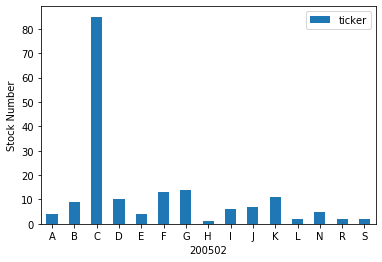

In [65]:
def groupstock_Quarter(data, limit1, limit2, year_quarter):
    data = data.loc[(data.year_quarter == year_quarter)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g = data.groupby('industry_code')['ticker'].count().reset_index()
    data_g = data_g.merge(industry, on=['industry_code'], how='left')
    #plot
    ax = data_g.plot.bar(x='industry_code', y='ticker', rot=0)
    plt.ylabel('Stock Number')
    plt.xlabel(year_quarter)
    return data_g

groupstock_Quarter(df7,0.3, 0.6, 200502)

In [66]:
# 季度列表
quarter = df7['year_quarter'].unique()
quarter

array([200501, 200502, 200503, 200504, 200601, 200602, 200603, 200604,
       200701, 200702, 200703, 200704, 200801, 200802, 200803, 200804,
       200901, 200902, 200903, 200904, 201001, 201002, 201003, 201004,
       201101, 201102, 201103, 201104, 201201, 201202, 201203, 201204,
       201301, 201302, 201303, 201304, 201401, 201402, 201403, 201404,
       201501, 201502, 201503, 201504, 201601, 201602, 201603, 201604,
       201701, 201702, 201703, 201704])

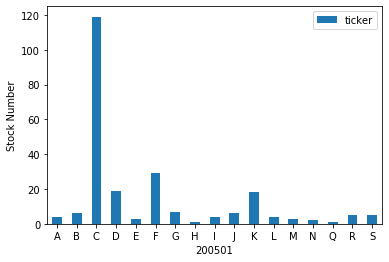

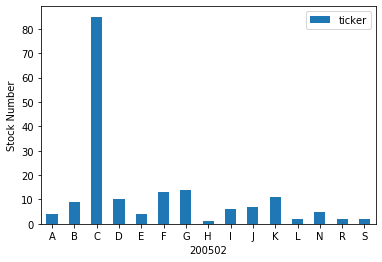

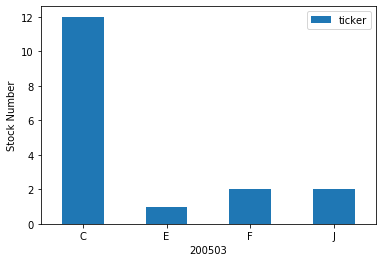

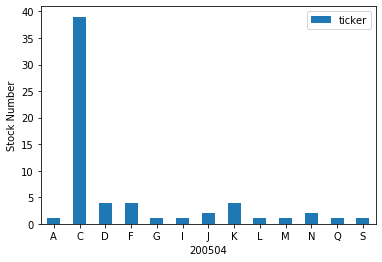

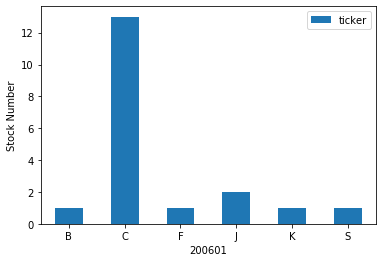

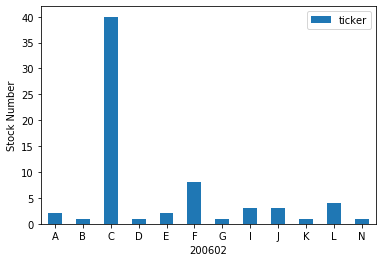

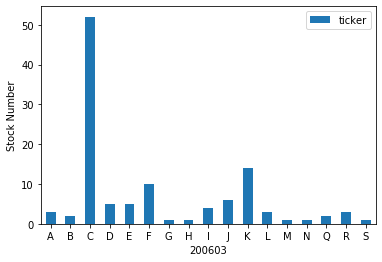

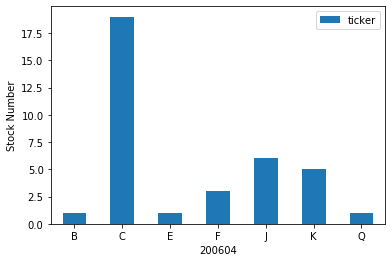

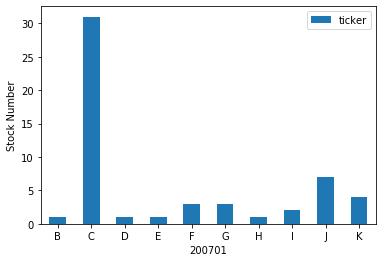

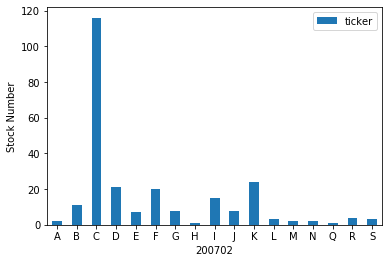

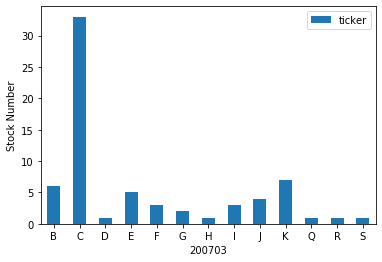

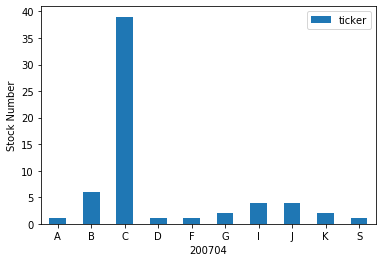

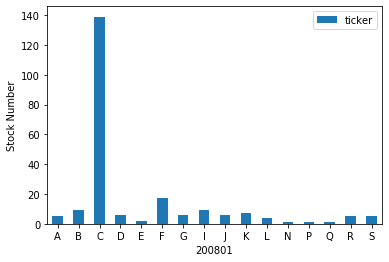

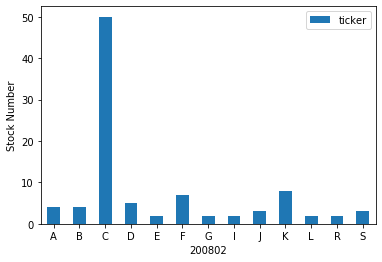

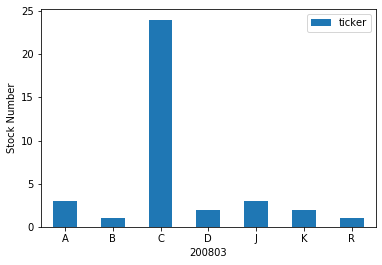

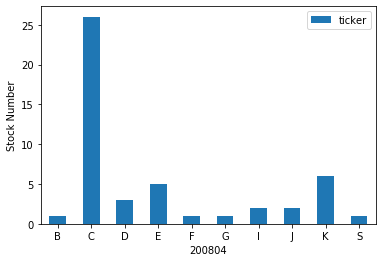

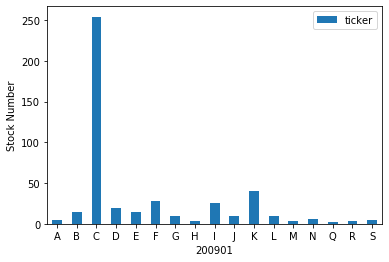

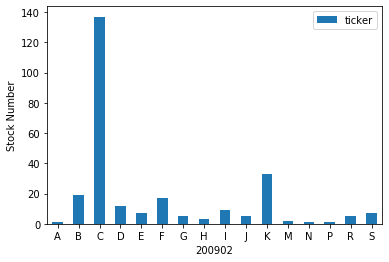

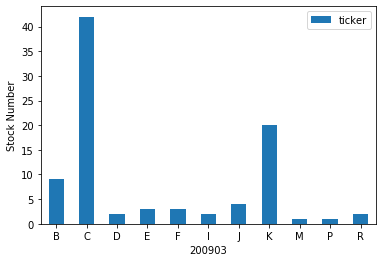

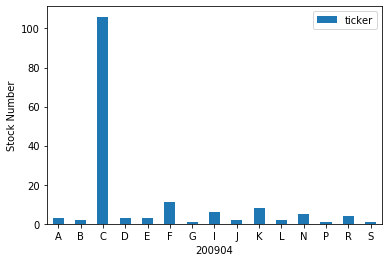

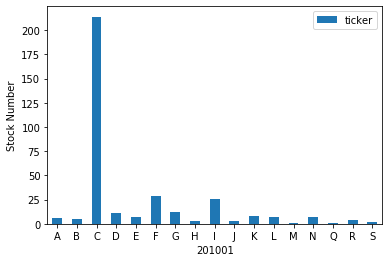

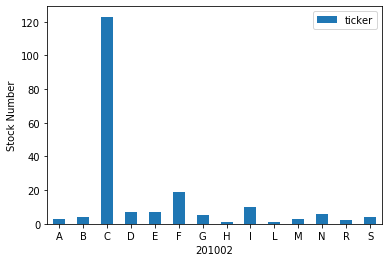

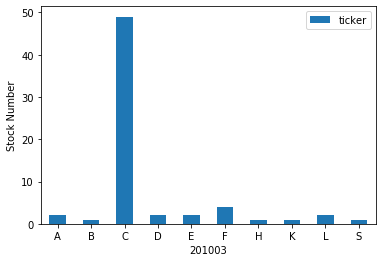

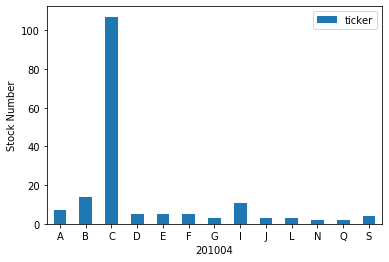

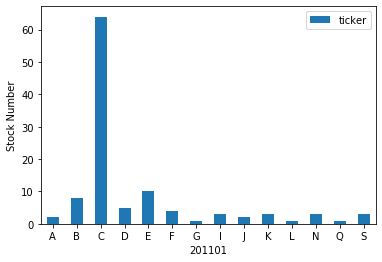

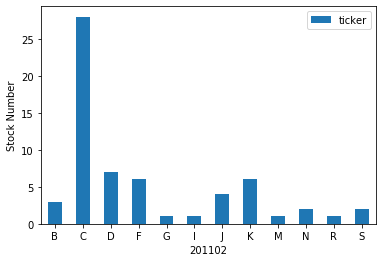

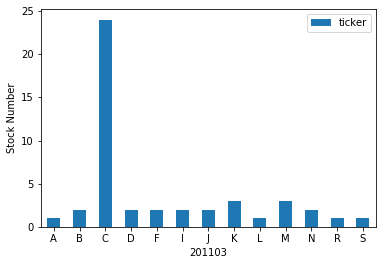

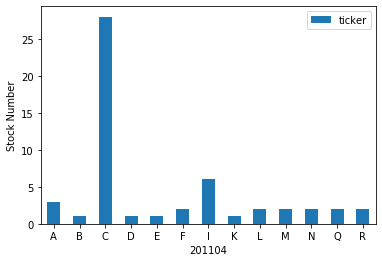

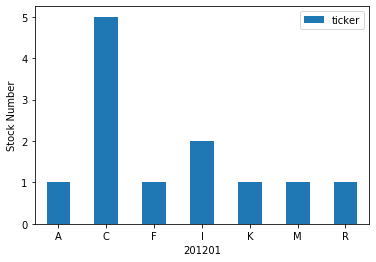

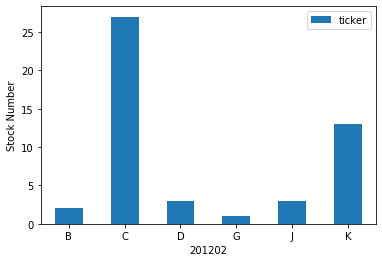

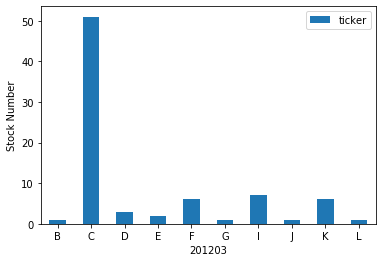

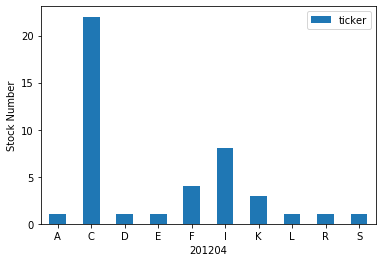

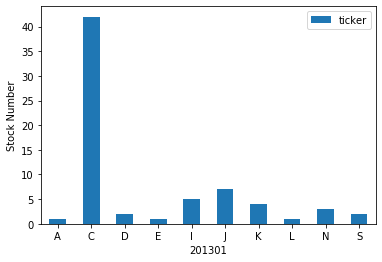

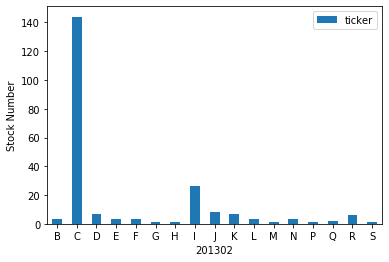

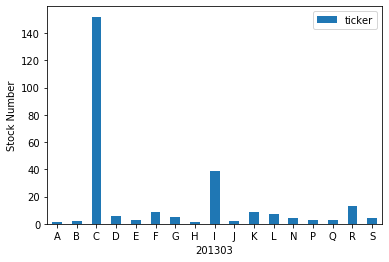

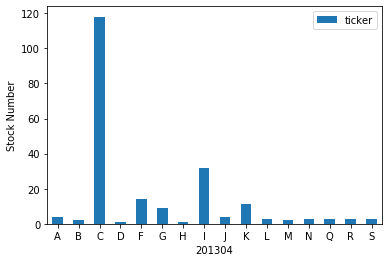

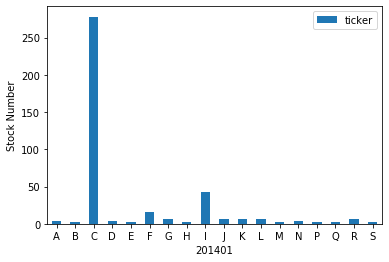

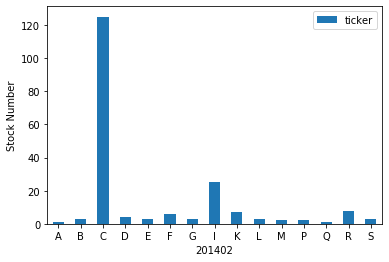

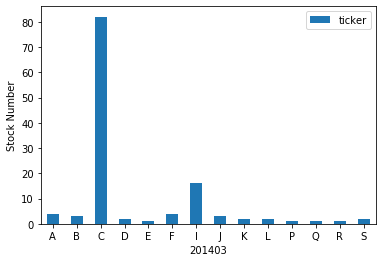

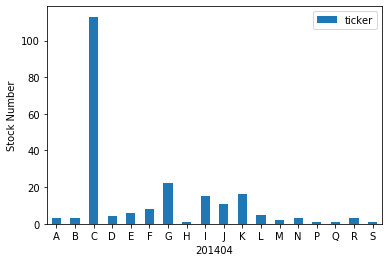

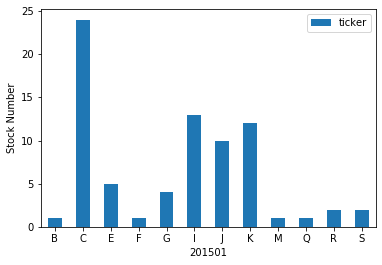

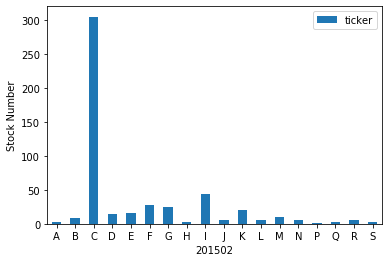

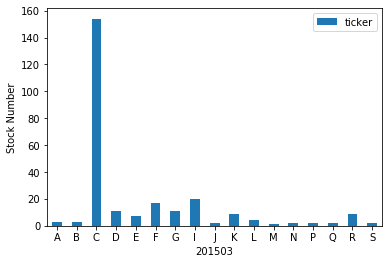

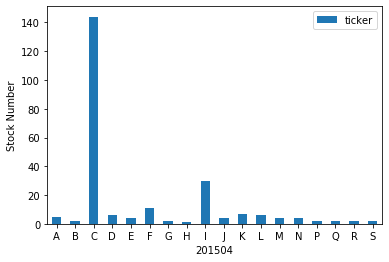

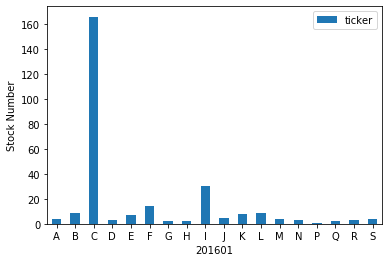

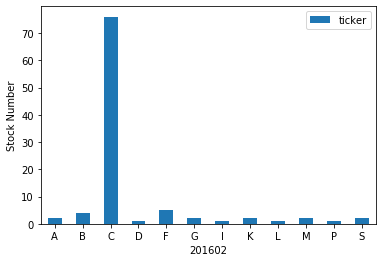

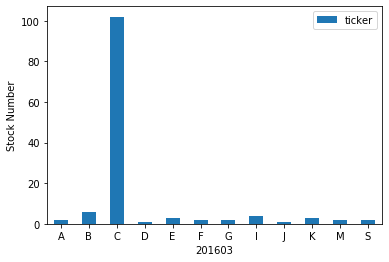

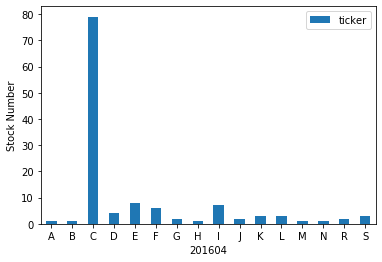

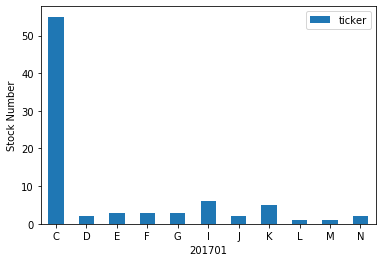

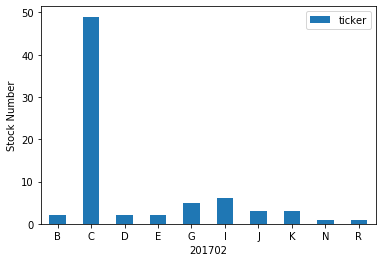

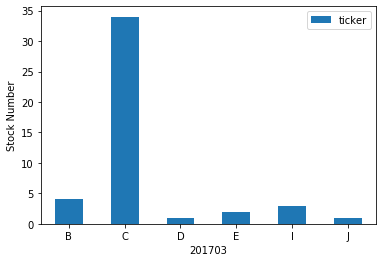

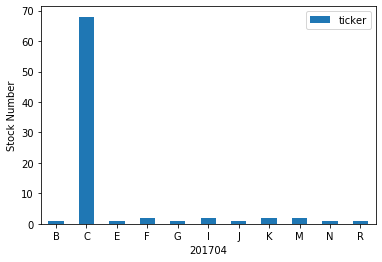

In [67]:
#全部quarter
for i in quarter:
   groupstock_Quarter(df7,0.3, 0.6, i)

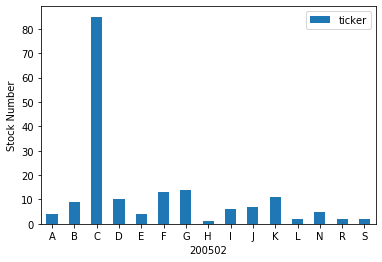

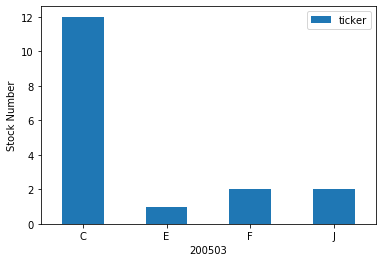

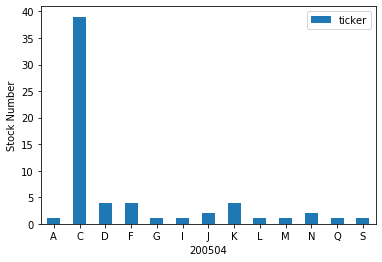

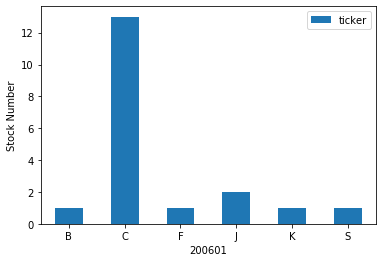

In [68]:
# plot 可以选择季度间plot
def plot_Quarter(data, limit1, limit2, year_quarter_limit1,year_quarter_limit2):
    for i in quarter:
        if (i >= int(year_quarter_limit1))&(i<=int(year_quarter_limit2)):
            groupstock_Quarter(data,limit1,limit2, i)
    return None

plot_Quarter(df7, 0.3, 0.6, 200502, 200601)


# 按net profit summary

In [69]:
#导入net profit
df_net_profit = pd.read_csv('/Users/jiayuncao/Desktop/Finance/1s/net_profit_ttm.csv', encoding='utf-8')
#时间区间定位2005-01-04到2017-12-01
df_net_profit = df_net_profit.loc[(df_net_profit['trade_days'] >= '2005-01-04')&(df_net_profit['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)

df_net_profit.head(10)

,trade_days,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,...,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH,T00018.SH
0,2005-01-04,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
1,2005-01-05,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
2,2005-01-06,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
3,2005-01-07,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
4,2005-01-10,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
5,2005-01-11,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
6,2005-01-12,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
7,2005-01-13,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
8,2005-01-14,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000
9,2005-01-17,408630275.00000,689475778.98000,-273177709.27000,8294556.66000,14569621.88000,-198562119.00000,-28566461.38000,1351708.62000,47723544.27000,...,59843154.39000,95283747.37000,31085136.97000,38346132.82000,1056834805.70000,99946829.02000,184242492.56000,88354171.86000,95626285.20000,1561281049.27000


In [70]:
#数据格式转化
df_net_profit_1 = df_net_profit.melt(id_vars=['trade_days'])
df_net_profit_1 = df_net_profit_1.rename(columns={'variable':'ticker'})
df_net_profit_1 = df_net_profit_1.rename(columns={'value':'net_profit'})
df_net_profit_1.head()

,trade_days,ticker,net_profit
0,2005-01-04,000001.SZ,408630275.00000
1,2005-01-05,000001.SZ,408630275.00000
2,2005-01-06,000001.SZ,408630275.00000
3,2005-01-07,000001.SZ,408630275.00000
4,2005-01-10,000001.SZ,408630275.00000


In [71]:
# Change the date string to a date variable
df_net_profit_1['trade_days'] = pd.to_datetime(df_net_profit_1['trade_days'], format='%Y-%m-%d')

#分年、季度
df_net_profit_1['year'] = df_net_profit_1['trade_days'].dt.year
df_net_profit_1['quarter'] = df_net_profit_1['trade_days'].dt.quarter
df_net_profit_1['year_quarter'] = df_net_profit_1.trade_days.dt.year * 100 + df_net_profit_1.trade_days.dt.quarter
df_net_profit_1.head()

,trade_days,ticker,net_profit,year,quarter,year_quarter
0,2005-01-04,000001.SZ,408630275.00000,2005,1,200501
1,2005-01-05,000001.SZ,408630275.00000,2005,1,200501
2,2005-01-06,000001.SZ,408630275.00000,2005,1,200501
3,2005-01-07,000001.SZ,408630275.00000,2005,1,200501
4,2005-01-10,000001.SZ,408630275.00000,2005,1,200501


In [72]:
#取每季度中net profit的mean值当作本季度该股票的net profit
df_net_profit_2 = df_net_profit_1.groupby(['ticker','year_quarter','year','quarter'])['net_profit'].mean().reset_index()
df_net_profit_2.head()

,ticker,year_quarter,year,quarter,net_profit
0,000001.SZ,200501,2005,1,408630275.00000
1,000001.SZ,200502,2005,2,292216853.20000
2,000001.SZ,200503,2005,3,206984603.33333
3,000001.SZ,200504,2005,4,225887105.06667
4,000001.SZ,200601,2006,1,249159360.00000


In [73]:
df_net_profit_2['net_profit'].describe().apply("{0:.4f}".format)

count          182832.0000
mean        564260653.9741
std        6091763212.0612
min      -15775054000.0000
25%          36988968.0462
50%          75895607.4200
75%         182909221.8608
max      280229000000.0000
Name: net_profit, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee48b19590>]],
      dtype=object)

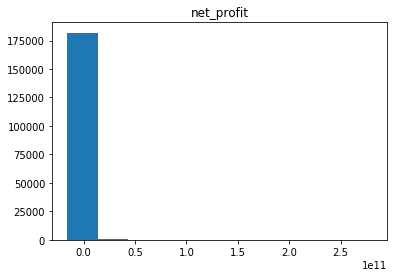

In [74]:
#histogram
df_net_profit_2.hist(grid=False,column="net_profit", bins = 10)

In [132]:
# bins=[np.NINF,36988968.0462,75895607.4200,182909221.8608,np.inf]
# labels=['0-25%','25-50%','50-75%','75-100%']
# #数值分组，right=False表示左闭右开，省略参数right表示左开右闭
# df_net_profit_2['等级_net_profit']=pd.cut(
#         df_net_profit_2['net_profit'],
#         bins,
#         right=False,
#         labels=labels)

# df_net_profit_2.head()

def nf_class(year):
    bins = ["1/6","1/3","1/2","2/3","1"]
    df_net_profit_2['等级_net_profit'] = pd.qcut(df_net_profit_2['net_profit'],q = [0,1/6,1/3,1/2,2/3,1],labels = bins)
    df_net_profit_2.head(100)

    dy = df_net_profit_2.loc[df_net_profit_2.year == year]
    
    dy.head()
    return dy
nf_class(2005)

,ticker,year_quarter,year,quarter,net_profit,等级_net_profit
0,000001.SZ,200501,2005,1,408630275.00000,1
1,000001.SZ,200502,2005,2,292216853.20000,1
2,000001.SZ,200503,2005,3,206984603.33333,1
3,000001.SZ,200504,2005,4,225887105.06667,1
52,000002.SZ,200501,2005,1,689475778.98000,1
...,...,...,...,...,...,...
184655,603999.SH,200504,2005,4,95626285.20000,2/3
184704,T00018.SH,200501,2005,1,1561281049.27000,1
184705,T00018.SH,200502,2005,2,1613589487.52350,1
184706,T00018.SH,200503,2005,3,1645312486.36000,1


In [133]:
#合并net profit和AR|industry数据
df8 = df7.merge(df_net_profit_2, on=['ticker','year_quarter','year','quarter'], how='left')
df8.head()

,ticker,year_quarter,year,quarter,AR,binned,stock_name,industry_code,industry_name,net_profit,等级_net_profit
0,000001.SZ,200501,2005,1,nan,NaN,平安银行,J,金融业,408630275.00000,1
1,000001.SZ,200502,2005,2,0.08963,"(0.0, 0.1]",平安银行,J,金融业,292216853.20000,1
2,000001.SZ,200503,2005,3,0.04078,"(0.0, 0.1]",平安银行,J,金融业,206984603.33333,1
3,000001.SZ,200504,2005,4,-0.04313,"(-0.1, 0.0]",平安银行,J,金融业,225887105.06667,1
4,000001.SZ,200601,2006,1,-0.04314,"(-0.1, 0.0]",平安银行,J,金融业,249159360.00000,1


,等级_net_profit,ticker
0,0-25%,699
1,25-50%,265
2,50-75%,198
3,75-100%,195


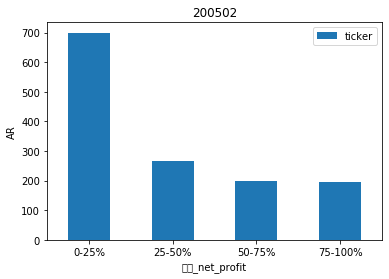

In [77]:
def plot_NetProfit(data, limit1, limit2, year_quarter):
    data = data.loc[(data.year_quarter == year_quarter)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g = data.groupby('等级_net_profit')['ticker'].count().reset_index()
    ax = data_g.plot.bar(x='等级_net_profit', y='ticker', rot=0)
    plt.title(year_quarter)
    plt.ylabel('AR')
    plt.xlabel('等级_net_profit')
    return data_g

plot_NetProfit(df8,np.NINF, np.inf, 200502)

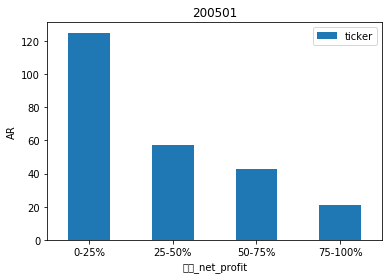

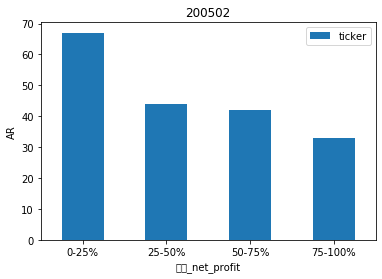

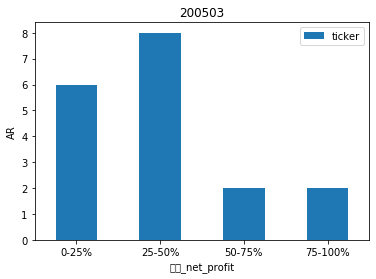

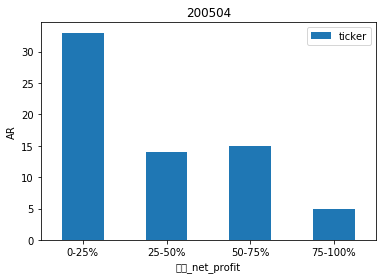

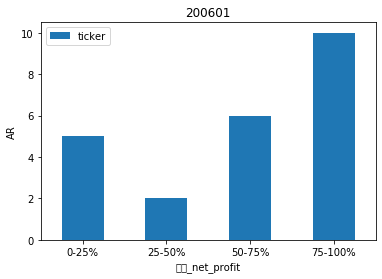

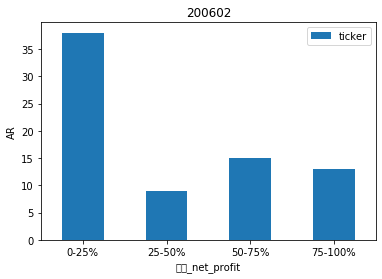

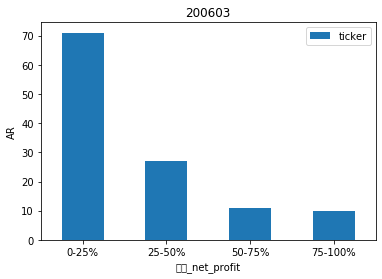

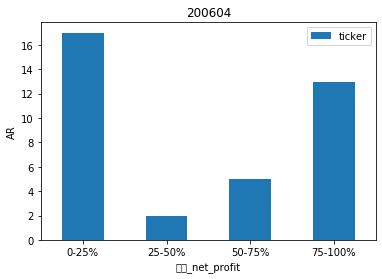

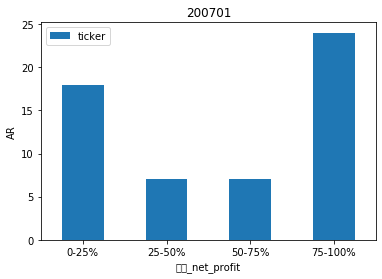

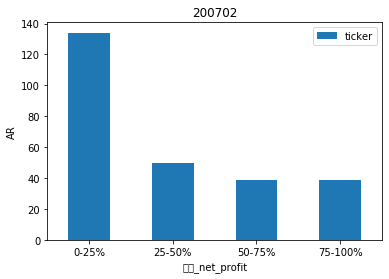

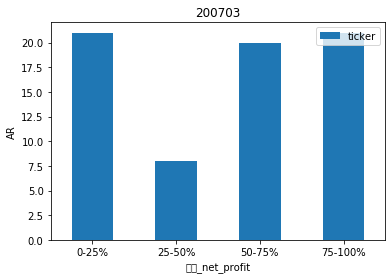

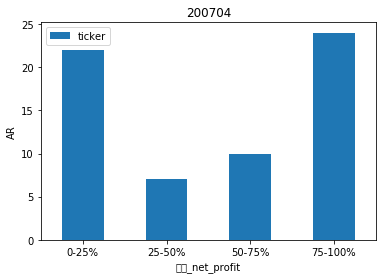

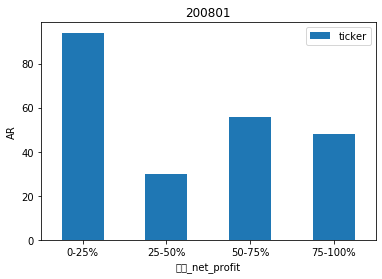

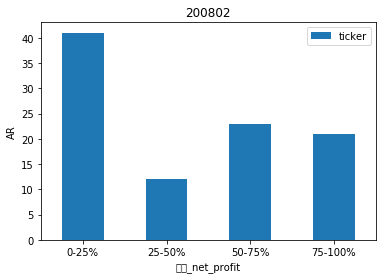

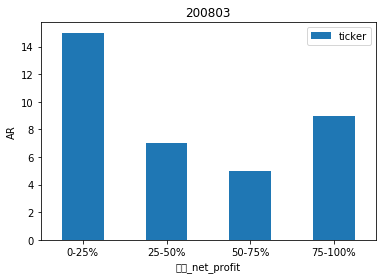

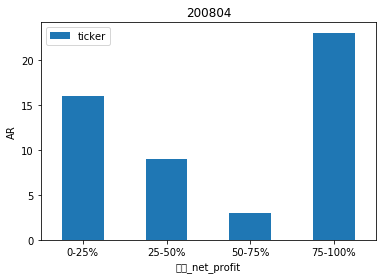

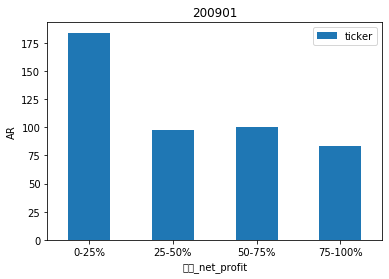

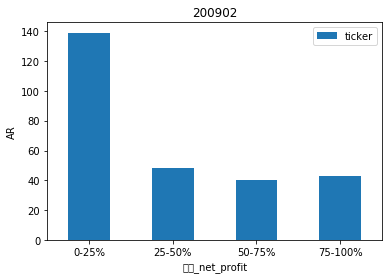

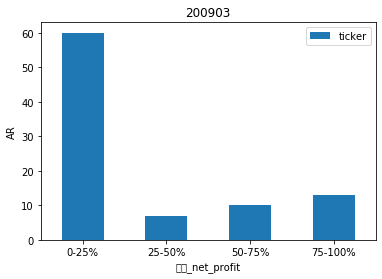

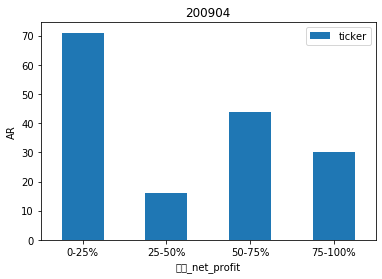

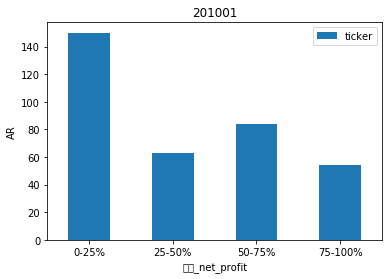

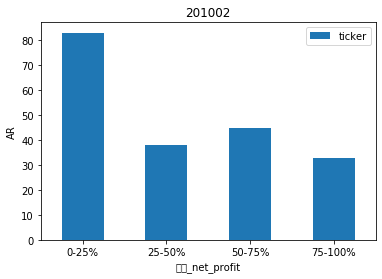

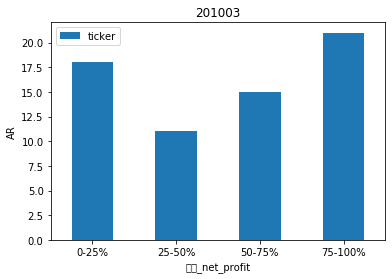

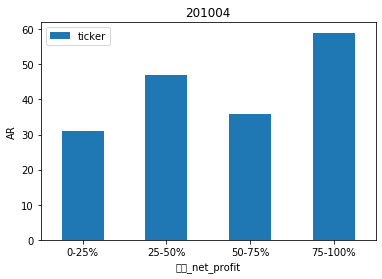

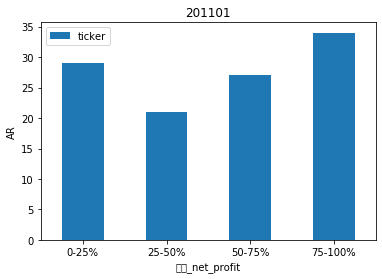

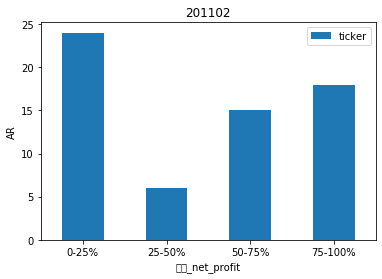

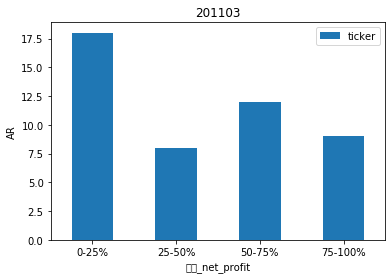

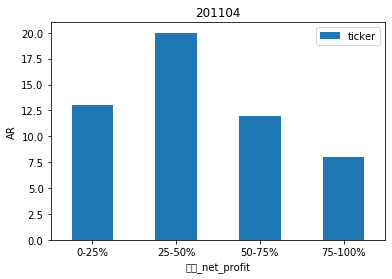

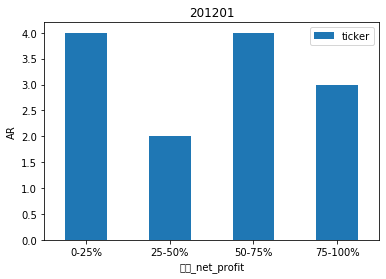

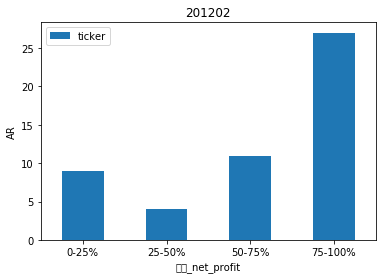

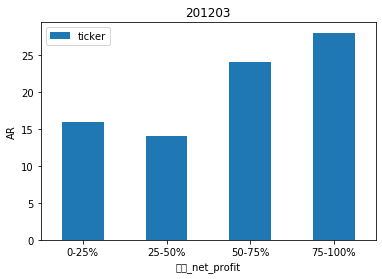

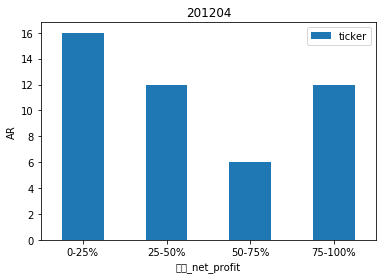

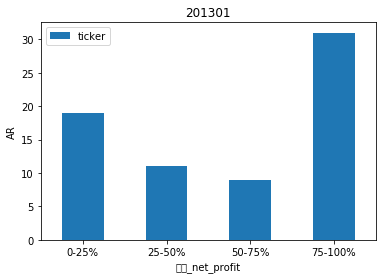

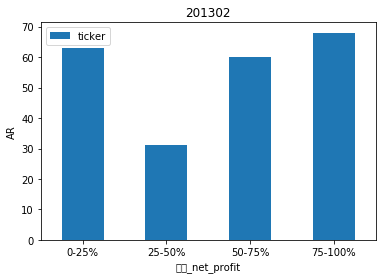

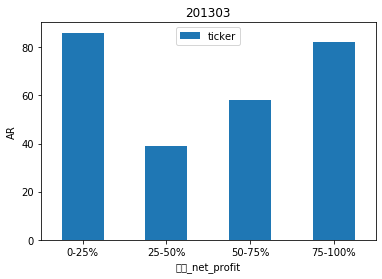

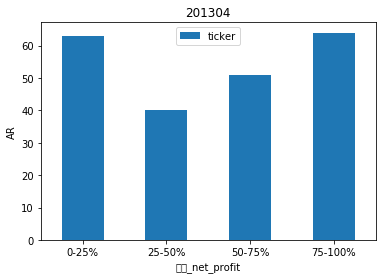

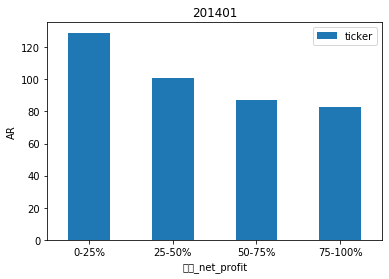

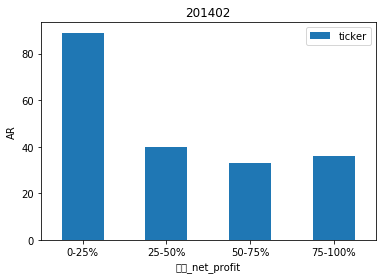

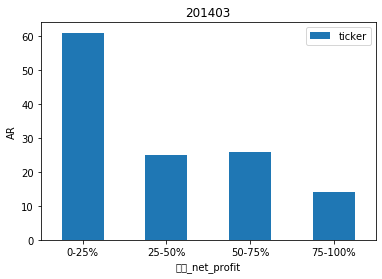

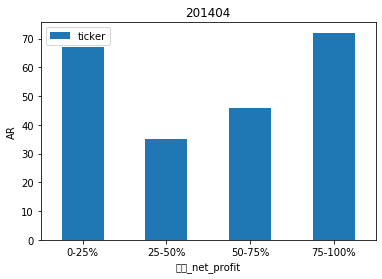

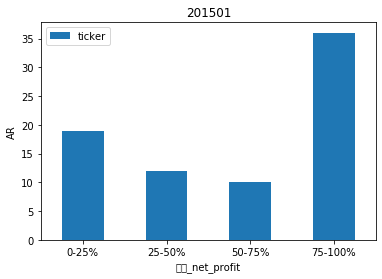

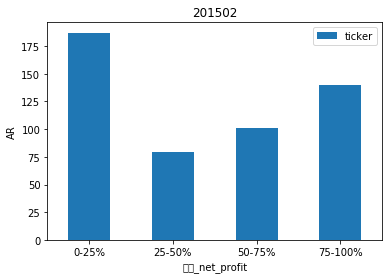

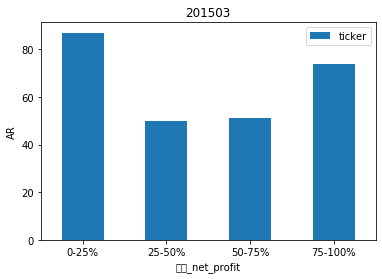

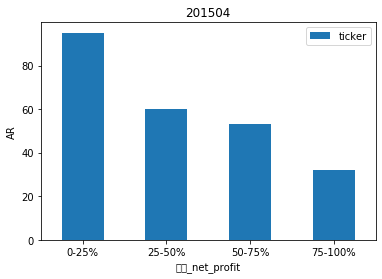

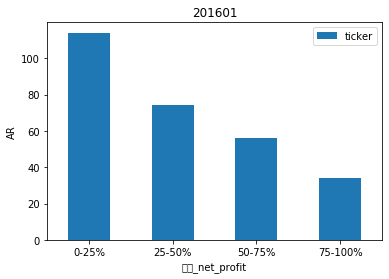

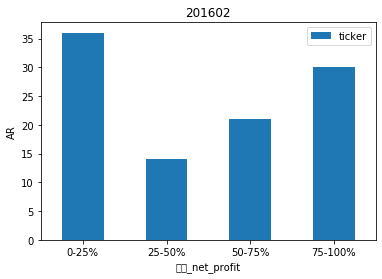

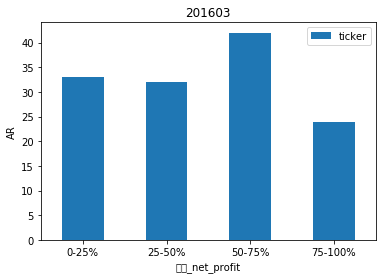

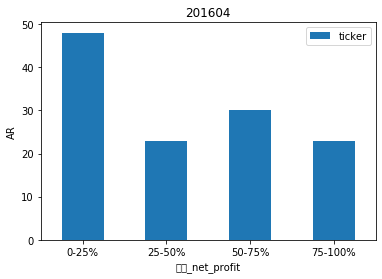

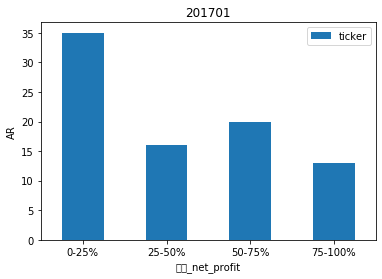

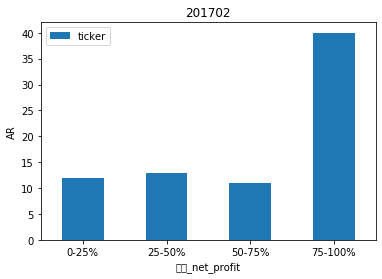

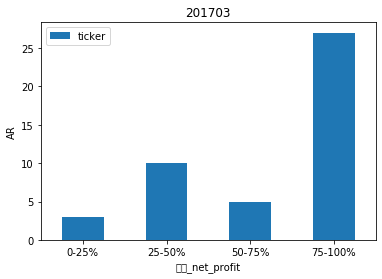

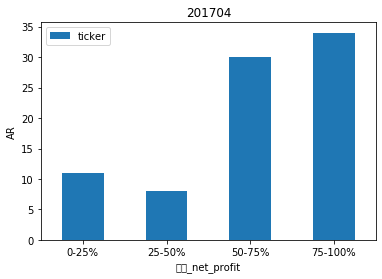

In [78]:
#全部quarter
for i in quarter:
    plot_NetProfit(df8,0.3, 0.6, i)

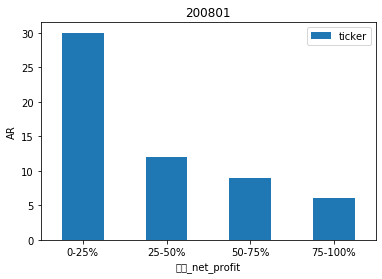

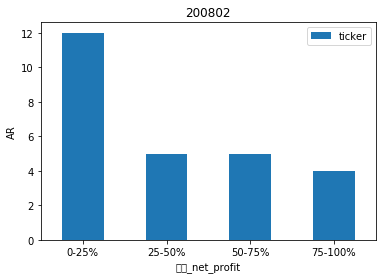

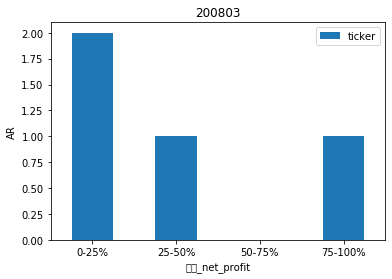

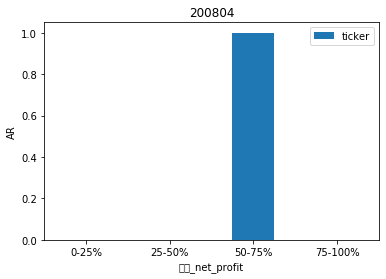

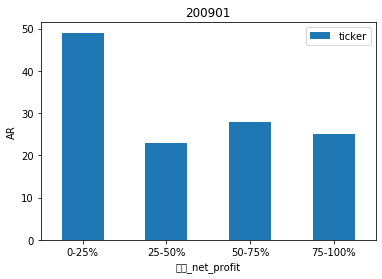

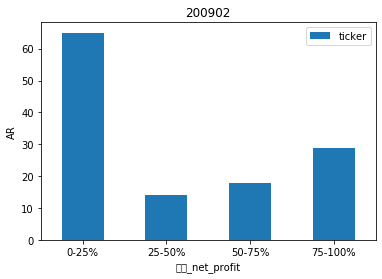

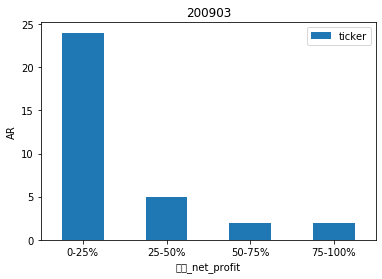

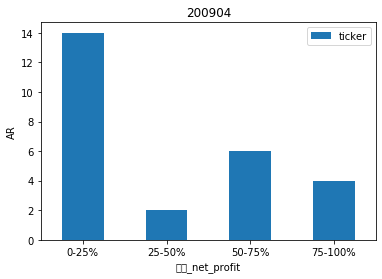

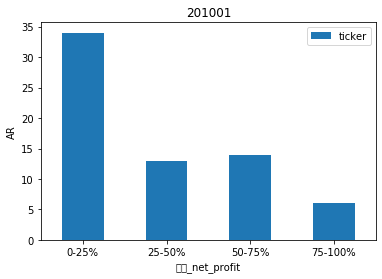

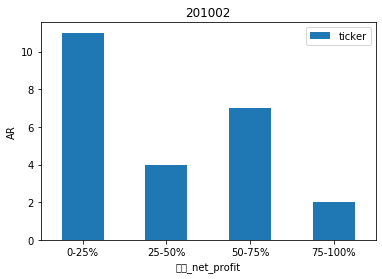

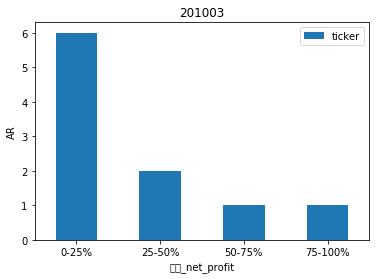

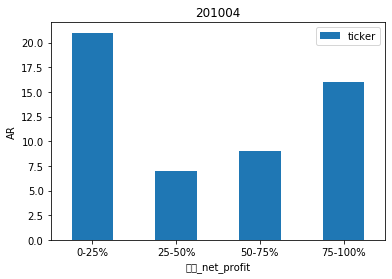

In [79]:
# plot 可以选择季度间plot
def plot_NetProfit_Quarter(data, limit1, limit2, year_quarter_limit1,year_quarter_limit2):
    for i in quarter:
        if (i >= int(year_quarter_limit1))&(i<=int(year_quarter_limit2)):
            plot_NetProfit(data,limit1, limit2, i)
    return None

plot_NetProfit_Quarter(df8, 0.6, np.inf, 200801, 201004)

# 按市值summary

In [80]:
#导入shares
df_mv = pd.read_csv("/Users/jiayuncao/Desktop/Finance/1s/s_val_mv.csv", encoding='utf-8')
#时间区间定位2005-01-04到2017-12-01
df_mv = df_mv.loc[(df_mv['trade_days'] >= '2005-01-04')&(df_mv['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)
df_mv.head(10)

,trade_days,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,...,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH,T00018.SH
0,2005-01-04,1268676.04110,1198201.88800,nan,56264.37830,150944.86030,106508.48500,49109.03310,61721.38830,323118.98420,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2710208.80000
1,2005-01-05,1257001.10830,1241400.81760,nan,57440.05190,154488.16690,108030.03480,50832.15710,63341.75890,328871.84440,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2731861.60000
2,2005-01-06,1268676.04110,1234579.93400,nan,57691.98190,153779.50560,107522.85150,50544.96970,63341.75890,326954.22430,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2742688.00000
3,2005-01-07,1266730.21900,1245948.07330,nan,57440.05190,161574.78000,118173.70000,52555.28100,65109.43590,333665.89460,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2762536.40000
4,2005-01-10,1282296.79620,1239127.18970,nan,57775.95860,166535.40930,124006.30760,57868.24660,68350.17700,342295.18500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2773362.80000
5,2005-01-11,1282296.79620,1252768.95690,nan,60127.30570,165826.74790,125527.85730,59878.55790,71738.22460,341336.37500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2834712.40000
6,2005-01-12,1270621.86330,1257316.21270,nan,59287.53890,163700.76400,123499.12430,57150.27830,75347.23180,336542.32470,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2818472.80000
7,2005-01-13,1278405.15190,1266410.72410,nan,60799.11920,165118.08660,127049.40710,62894.02480,75199.92540,341336.37500,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2825690.40000
8,2005-01-14,1264784.39690,1243674.44540,nan,59371.51560,158740.13480,121216.79960,63611.99320,75199.92540,333665.89460,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2814864.00000
9,2005-01-17,1216138.84310,1236853.56180,nan,57524.02850,153779.50560,121723.98290,65335.11710,71590.91820,330789.46450,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2789602.40000


In [81]:
#数据格式转化
df_mv_1 = df_mv.melt(id_vars=['trade_days'])
df_mv_1 = df_mv_1.rename(columns={'variable':'ticker'})
df_mv_1 = df_mv_1.rename(columns={'value':'mv'})
df_mv_1.head()

,trade_days,ticker,mv
0,2005-01-04,000001.SZ,1268676.04110
1,2005-01-05,000001.SZ,1257001.10830
2,2005-01-06,000001.SZ,1268676.04110
3,2005-01-07,000001.SZ,1266730.21900
4,2005-01-10,000001.SZ,1282296.79620


In [82]:
# Change the date string to a date variable
df_mv_1['trade_days'] = pd.to_datetime(df_mv_1['trade_days'], format='%Y-%m-%d')

#分年、季度
df_mv_1['year'] = df_mv_1['trade_days'].dt.year
df_mv_1['quarter'] = df_mv_1['trade_days'].dt.quarter
df_mv_1['year_quarter'] = df_mv_1.trade_days.dt.year * 100 + df_mv_1.trade_days.dt.quarter
df_mv_1.head()

,trade_days,ticker,mv,year,quarter,year_quarter
0,2005-01-04,000001.SZ,1268676.04110,2005,1,200501
1,2005-01-05,000001.SZ,1257001.10830,2005,1,200501
2,2005-01-06,000001.SZ,1268676.04110,2005,1,200501
3,2005-01-07,000001.SZ,1266730.21900,2005,1,200501
4,2005-01-10,000001.SZ,1282296.79620,2005,1,200501


In [119]:
#取每季度中mv的mean值当作本季度该股票的mv

df_mv_2 = df_mv_1.groupby(['ticker','year','quarter'])['mv'].mean().reset_index()
df_mv_2.head()

,ticker,year,quarter,mv
0,000001.SZ,2005,1,1207452.13711
1,000001.SZ,2005,2,1207285.35235
2,000001.SZ,2005,3,1170647.87985
3,000001.SZ,2005,4,1137203.32460
4,000001.SZ,2006,1,1239662.44303


In [120]:
df_mv_2['mv'].describe().apply("{0:.4f}".format)

count       111298.0000
mean       1400623.3326
std        7385988.6409
min           8136.1280
25%         242587.3206
50%         463159.8650
75%         931061.1563
max      618761897.3315
Name: mv, dtype: object

In [139]:
bins=[np.NINF,125329.9310,290582.9305,631693.0343,np.inf]
labels=['0-25%','25-50%','50-75%','75-100%']
#数值分组，right=False表示左闭右开，省略参数right表示左开右闭
df_mv_2['mv_class']=pd.cut(
        df_mv_2['mv'],
        bins,
        right=False,
        labels=labels)

df_mv_2.head()

,ticker,year,quarter,mv,等级_mv,mv_class
0,000001.SZ,2005,1,1207452.13711,1,75-100%
1,000001.SZ,2005,2,1207285.35235,1,75-100%
2,000001.SZ,2005,3,1170647.87985,1,75-100%
3,000001.SZ,2005,4,1137203.32460,1,75-100%
4,000001.SZ,2006,1,1239662.44303,1,75-100%


In [140]:
# def mv_class(year):
#     bins = ["1/6","1/3","1/2","2/3","1"]
#     df_mv_2['等级_mv'] = pd.qcut(df_mv_2['mv'],q = [0,1/6,1/3,1/2,2/3,1],labels = bins)
#     df_mv_2.head(100)

#     dy = df_mv_2.loc[df_mv_2.year == year]
    
#     dy.head()
#     return dy
# mv_class(2005)

In [141]:
#合并mv和AR\industry\net_profit数据
df9 = mv_class(2005).merge(df8, on=['ticker','year','quarter'], how='left')
df9.head()

,ticker,year,quarter,mv,等级_mv,mv_class,year_quarter,AR,binned,stock_name,industry_code,industry_name,net_profit,等级_net_profit
0,000001.SZ,2005,1,1207452.13711,1,75-100%,200501,nan,NaN,平安银行,J,金融业,408630275.00000,1
1,000001.SZ,2005,2,1207285.35235,1,75-100%,200502,0.08963,"(0.0, 0.1]",平安银行,J,金融业,292216853.20000,1
2,000001.SZ,2005,3,1170647.87985,1,75-100%,200503,0.04078,"(0.0, 0.1]",平安银行,J,金融业,206984603.33333,1
3,000001.SZ,2005,4,1137203.32460,1,75-100%,200504,-0.04313,"(-0.1, 0.0]",平安银行,J,金融业,225887105.06667,1
4,000002.SZ,2005,1,1288659.79688,1,75-100%,200501,0.24899,"(0.2, 0.3]",万科A,K,房地产业,689475778.98000,1


In [142]:
# 每年股票数量，按最后一天统计
def number_stk(data, year):
    group1 = data.loc[(data.year == year)]
    group2 = group1.iloc[-1,:]
    print(group2)
    number = group2.count()-1
    
    
    return number
number_stk(dr, 2005)


trade_days    2005-12-30 00:00:00
000001.SZ                 6.14000
000002.SZ                 4.31000
000003.SZ                     NaN
000004.SZ                 4.14000
                     ...         
603997.SH                     NaN
603998.SH                     NaN
603999.SH                     NaN
T00018.SH                11.31000
year                         2005
Name: 241, Length: 3555, dtype: object


1354

trade_days    2005-12-30 00:00:00
000001.SZ                 6.14000
000002.SZ                 4.31000
000003.SZ                     NaN
000004.SZ                 4.14000
                     ...         
603997.SH                     NaN
603998.SH                     NaN
603999.SH                     NaN
T00018.SH                11.31000
year                         2005
Name: 241, Length: 3555, dtype: object
[0.25129246676514033, 0.15251107828655835, 0.055945347119645494, 0.03563515509601182]


(  mv_class  ticker
 0    0-25%     423
 1   25-50%     326
 2   50-75%     109
 3  75-100%      71,
   mv_class  ticker
 0    0-25%     390
 1   25-50%     236
 2   50-75%      99
 3  75-100%      65,
   mv_class  ticker
 0    0-25%     133
 1   25-50%      86
 2   50-75%      34
 3  75-100%      31,
   mv_class  ticker
 0    0-25%     415
 1   25-50%     178
 2   50-75%      61
 3  75-100%      26,
 0    423
 1    326
 2    109
 3     71
 Name: ticker, dtype: int64,
 0    390
 1    236
 2     99
 3     65
 Name: ticker, dtype: int64,
 0    133
 1     86
 2     34
 3     31
 Name: ticker, dtype: int64,
 0    415
 1    178
 2     61
 3     26
 Name: ticker, dtype: int64,
 0-25%     0.25129
 25%-50%   0.15251
 50%-75%   0.05595
 75-100%   0.03564
 dtype: float64)

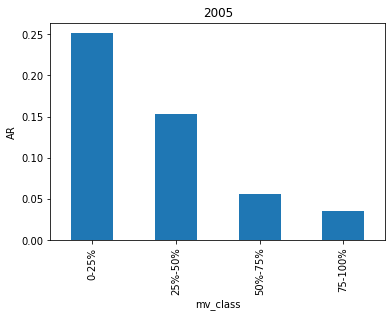

In [147]:
# def plot_Mv(data, limit1, limit2, year_quarter):
#     data = data.loc[(data.year_quarter == year_quarter)&(data.AR>limit1)&(data.AR<=limit2)]
#     data_g = data.groupby('mv_class')['ticker'].count().reset_index()
#     ex = data_g['ticker'] 
   
#     ax = data_g.plot.bar(x='mv_class', y='ticker', rot=0)
#     plt.title(year_quarter)
#     plt.ylabel('AR')
#     plt.xlabel('mv_class')
#     return data_g, ex

# plot_Mv(df9, 0.03, 1.6, 200501)
# dy = df8.loc[(df8.year == 2005)]['ticker'].count()
# print(dy)
def plot_Mv_all(data, limit1, limit2, year, year_quarter1,year_quarter2,year_quarter3,year_quarter4):
# def plot_Mv(data, limit1, limit2, year_quarter1):
    data1 = data.loc[(data.year_quarter == year_quarter1)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g1 = data1.groupby('mv_class')['ticker'].count().reset_index()
    ex1 = data_g1['ticker']
#     等级为0

    
    data2 = data.loc[(data.year_quarter == year_quarter2)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g2 = data2.groupby('mv_class')['ticker'].count().reset_index()
    ex2 = data_g2['ticker']
    
    data3 = data.loc[(data.year_quarter == year_quarter3)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g3 = data3.groupby('mv_class')['ticker'].count().reset_index()
    ex3 = data_g3['ticker'] 
    
    data4 = data.loc[(data.year_quarter == year_quarter4)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g4 = data4.groupby('mv_class')['ticker'].count().reset_index()
#     print(data_g4,data_g3,data_g2,data_g1)
#     df8.groupby('year')
#     print(df8.loc[(df8.year == year)])/
    ex4 = data_g4['ticker'] 
    
    
    num = number_stk(dr,year)
    sum = []
    for i in range(4):
        a=(ex1[i]+ex2[i]+ex3[i]+ex4[i])/(4*num)
        sum.append(a)
    print(sum)
    sum = Series(sum, index = ['0-25%','25%-50%','50%-75%','75-100%'])
    pd.concat([sum, pd.DataFrame(columns=list('DE'))])
    ax = sum.plot.bar()
    plt.title(year)
    plt.ylabel('AR')
    plt.xlabel('mv_class')
    return data_g1, data_g2, data_g3, data_g4, ex1, ex2, ex3, ex4, sum
    return sum
# plot_Mv_all(df9, 0.03, 1.6, 200501)
plot_Mv_all(df9, 0.03, 1.6, 2005, 200501, 200502, 200503, 200504)

In [89]:
def plot_Mv(data, limit1, limit2, year_quarter):
    data1 = data.loc[(data.year_quarter == year_quarter)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g = data1.groupby('等级_mv')['ticker'].count().reset_index()
    

    return data_g
plot_Mv(df9, 0.03, 1.6, 200501)

,等级_mv,ticker
0,0-25%,423
1,25-50%,326
2,50-75%,109
3,75-100%,71


In [90]:
def plot_Mv(data, limit1, limit2, year_quarter):
    data = data.loc[(data.year_quarter == year_quarter)&(data.AR>limit1)&(data.AR<=limit2)]
    data_g = data.groupby('等级_mv')['ticker'].count().reset_index()
    ex = data_g['ticker'] 
   
   
    return data_g

plot_Mv(df9, 0.03, 1.6, 200501)

,等级_mv,ticker
0,0-25%,423
1,25-50%,326
2,50-75%,109
3,75-100%,71


In [91]:
#全部quarter
for i in quarter:
    plot_Mv(df9,0.3, 0.6, i)

In [92]:
# plot 可以选择季度间plot
def plot_Mv_Quarter(data, limit1, limit2, year_quarter_limit1,year_quarter_limit2):
    for i in quarter:
        if (i >= int(year_quarter_limit1))&(i<=int(year_quarter_limit2)):
            plot_Mv(data,limit1, limit2, i)
    return None

plot_Mv_Quarter(df9, 0.6, np.inf, 200801, 201004)